# Simple Linear Regression
Linear regression example using scikit-learn. This method computes the least squares solution using a singular value decomposition of $X$. If $X$ is a matrix of size $(n, p)$ this method has a cost of $O(n p^2)$, assuming that $n \geq p$.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()
type(diabetes)

sklearn.datasets.base.Bunch

## load_dataset()

[Documentation of load_datasets() function](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

Diabetes is a bunch object, which is dictionary-like object. The interesting attributes are: ‘data’, the data to learn and ‘target’, the regression target for each sample.

The data variable in the bunch object.

In [36]:
print(type(diabetes.data))
print(diabetes.data) # this is the numpy array containing the predictors
print(diabetes.data.shape)

# some slicing operation on a numpy array
diabetes.data[1, 1:3]

array([-0.04464164, -0.05147406])

The target variable in the bunch object.

In [26]:
print(type(diabetes.target))
print(diabetes.target) # this is the numpy array containing the response
print(diabetes.target.shape)

<class 'numpy.ndarray'>
[[ 0.03807591  0.05068012  0.06169621 ..., -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ..., -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ..., -0.00259226  0.00286377
  -0.02593034]
 ..., 
 [ 0.04170844  0.05068012 -0.01590626 ..., -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...,  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ..., -0.03949338 -0.00421986
   0.00306441]]
(442, 10)
<class 'numpy.ndarray'>
[ 151.   75.  141.  206.  135.   97.  138.   63.  110.  310.  101.   69.
  179.  185.  118.  171.  166.  144.   97.  168.   68.   49.   68.  245.
  184.  202.  137.   85.  131.  283.  129.   59.  341.   87.   65.  102.
  265.  276.  252.   90.  100.   55.   61.   92.  259.   53.  190.  142.
   75.  142.  155.  225.   59.  104.  182.  128.   52.   37.  170.  170.
   61.  144.   52.  128.   71.  163.  150.   97.  160.  178.   48.  270.
  20

We will perform linear regression on the third variable only. We need to grab that feature from the numpy array data. We slice the third column from the data as follows.

In [43]:
# this will extract the third variable as a row vector
diabetes.data[:,2]

# to convert that into a column vector we need to add another dimension (or axis)
diabetes.data[:, np.newaxis, 2]

# saving this in another variable
diabetes_X = diabetes.data[:, np.newaxis, 2]

## Partitioning into train and test sets
Now, we split into training and test sets. Leaving out the second index implies that we want to grab all the columns (only one column here).

In [74]:
diabetes_X_train = diabetes_X[:-20] # everything but the last 20 rows
diabetes_X_test = diabetes_X[-20:] # the last 20 rows

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

## Performing the regression

[linear_model.LinearRegression()](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

We can specify different parameters to the linear model function like
- Fitting an intercept
- Normalizing the data (subtracting mean and dividing by standard deviance)
- Whether we want to use multiple cores to perform the regression

Fitting a linear model and making predictions.

In [76]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

## Coefficients, MSPE and $R^2$

In [87]:
# The intercept
print('Intercept: \n', regr.intercept_)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Intercept: 
 152.918861826
Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


## Plotting the data and the regression line

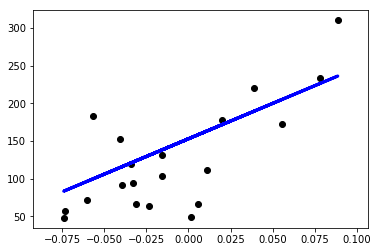

In [86]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black') 
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()